In [1]:
import at
import at.plot
import numpy as np
import matplotlib.pyplot as aplt

ring = at.load_mat('./dba.mat', mat_key='RING')
arc = at.load_mat('./arc.mat', mat_key='ARC')

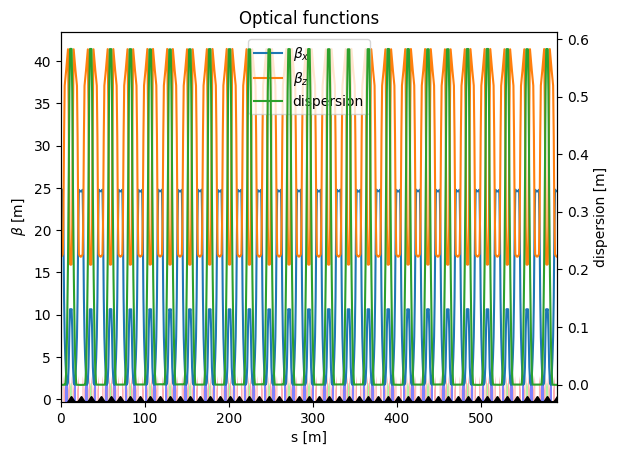

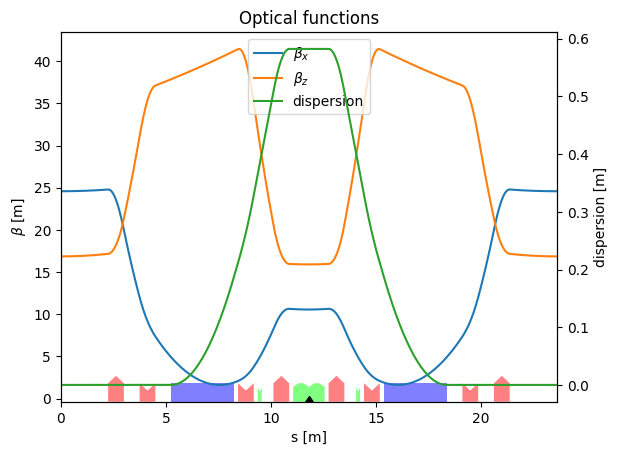

(<AxesSubplot:title={'center':'Optical functions'}, xlabel='s [m]', ylabel='$\\beta$ [m]'>,
 <AxesSubplot:ylabel='dispersion [m]'>,
 <AxesSubplot:>)

In [2]:
ring.plot_beta()
arc.plot_beta()

There are many other handy functions for modifying the lattice in this way including a lot of the standard python list modifications:
> 1. sbreak
> 2. slice
> 3. insert
> 4. remove
> 5. append
> 6. pop
> 7. repeat
> 8. reduce 


## sbreak

In [3]:
ring.sbreak?

Signature: ring.sbreak(break_s, break_elems=None, **kwargs)
Docstring:
Insert elements at selected locations in the lattice

Parameters:
    break_s:        location or array of locations of breakpoints
    break_elems:    elements to be inserted at breakpoints (array of
                    elements as long as break_s or single element
                    duplicated as necessary). Default: Marker('sbreak')
Returns:
    newring:    A new lattice with new elements inserted at breakpoints
File:      /mnt/multipath-shares/machfs/carver/pyat_dev/at/pyat/at/lattice/lattice_object.py
Type:      method


In [4]:
ring_tmp = ring.deepcopy()
ring_tmp[0]

Drift('DR_01', 2.25)

In [5]:
ring_tmp = ring_tmp.sbreak(0.2, at.Marker('hello'))
print(ring_tmp[0],'\n', ring_tmp[1],'\n', ring_tmp[2])

Drift:
	FamName : DR_01
	Length : 0.2000000000000003
	PassMethod : DriftPass 
 Marker:
	FamName : hello
	Length : 0.0
	PassMethod : IdentityPass 
 Drift:
	FamName : DR_01
	Length : 2.05
	PassMethod : DriftPass


In [6]:
ring_tmp = ring_tmp.sbreak(2.8, at.Marker('QuadSplit'))
print(ring_tmp[3],'\n', ring_tmp[4],'\n', ring_tmp[5])

Quadrupole:
	FamName : QF1
	Length : 0.5499999999999998
	PassMethod : StrMPoleSymplectic4RadPass
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [0.      0.38041]
	Energy : 3000000000.0
	K : 0.38041 
 Marker:
	FamName : QuadSplit
	Length : 0.0
	PassMethod : IdentityPass 
 Quadrupole:
	FamName : QF1
	Length : 0.20000000000000018
	PassMethod : StrMPoleSymplectic4RadPass
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [0.      0.38041]
	Energy : 3000000000.0
	K : 0.38041


For quadrupoles, there is an flag for the inclusion or exclusion of fringe fields at the entrance and exit of the quadrupoles. When you split the quadrupole, the internal fringe fields are disabled, and the outer fringe fields are kept. Similarly when you split a dipole, the exit and entrance angles are modified to ensure a continuous bend. 

## slice / divide / merge

You slice a lattice, you divide an element

In [7]:
ring_tmp = ring.deepcopy()

In [8]:
quad = ring_tmp[3]
print(quad, '\n')
quad_div = quad.divide([0.5, 0.4])
print(quad_div[0], '\n', quad_div[1])

Quadrupole:
	FamName : QD2
	Length : 0.75
	PassMethod : StrMPoleSymplectic4RadPass
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [ 0.     -0.2708]
	Energy : 3000000000.0
	K : -0.2708 

Quadrupole:
	FamName : QD2
	Length : 0.375
	PassMethod : StrMPoleSymplectic4RadPass
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [ 0.     -0.2708]
	Energy : 3000000000.0
	K : -0.2708 
 Quadrupole:
	FamName : QD2
	Length : 0.30000000000000004
	PassMethod : StrMPoleSymplectic4RadPass
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [ 0.     -0.2708]
	Energy : 3000000000.0
	K : -0.2708


It may be useful to make nice smooth plots (for example of optics functions in the middle of elements and not just at the edges). For this you can use slice.

In [9]:
ring_tmp.slice?

Signature: ring_tmp.slice(size: 'Optional[float]' = None, slices: 'Optional[int]' = 1) -> 'Lattice'
Docstring:
Create a new lattice by slicing the range of interest into small
elements

Keyword arguments:
    size=None:      Length of a slice. Default: computed from the
      range and number of points: ``size = (s_max-s_min)/slices``.
    slices=1:       Number of slices in the specified range. Ignored if
      size is specified. Default: no slicing

Returns:
    newring:    New Lattice object
File:      /mnt/multipath-shares/machfs/carver/pyat_dev/at/pyat/at/lattice/lattice_object.py
Type:      method


In [10]:
new_ring_tmp = ring_tmp.slice(slices=2000)

In [12]:
msk = at.get_value_refpts(ring_tmp, np.arange(len(ring_tmp)), 'Length') == 0
print(len(ring_tmp) - np.sum(msk))

msk = at.get_value_refpts(new_ring_tmp, np.arange(len(new_ring_tmp)), 'Length') == 0
print(len(new_ring_tmp) - np.sum(msk))


700
2300


Zero length elements are of course not touched, but one can also specify a dz too

We can also do the opposite of split, which is to merge two identical and adjacent elements

In [13]:
q = ring_tmp[3]

In [14]:
print(q)

Quadrupole:
	FamName : QD2
	Length : 0.75
	PassMethod : StrMPoleSymplectic4RadPass
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [ 0.     -0.2708]
	Energy : 3000000000.0
	K : -0.2708


In [15]:
q.merge(q)

In [16]:
print(q)

Quadrupole:
	FamName : QD2
	Length : 1.5
	PassMethod : StrMPoleSymplectic4RadPass
	NumIntSteps : 10
	MaxOrder : 1
	PolynomA : [0. 0.]
	PolynomB : [ 0.     -0.2708]
	Energy : 3000000000.0
	K : -0.2708


In [17]:
dr = ring_tmp[0]
print(dr)

Drift:
	FamName : DR_01
	Length : 2.25
	PassMethod : DriftPass


In [18]:
dr.merge(dr)
print(dr)

Drift:
	FamName : DR_01
	Length : 4.5
	PassMethod : DriftPass


## insert / append / pop / remove

Lattice objects are fundamentally lists. Which means that all of the standard python operations that can be performed on lists are valid for a lattice object

In [19]:
ring_tmp = ring.deepcopy()

In [20]:
ring_tmp.insert(4, at.Marker('insert_test'))

In [21]:
print(ring_tmp[4])

Marker:
	FamName : insert_test
	Length : 0.0
	PassMethod : IdentityPass


Append puts elements automatically at the end. It is equivalent to insert with an index of -1


In [22]:
ring_tmp.append(at.Marker('append_test'))
print(ring_tmp[-1])

Marker:
	FamName : append_test
	Length : 0.0
	PassMethod : IdentityPass


Pop removes and returns the element at the specified index

In [23]:
mark = ring_tmp.pop(-1)

In [24]:
print(mark)
print(ring_tmp[-1])

Marker:
	FamName : append_test
	Length : 0.0
	PassMethod : IdentityPass
Corrector:
	FamName : Corrector
	Length : 0.0
	PassMethod : CorrectorPass
	KickAngle : [0. 0.]


In [25]:
mrk = at.Marker('ahoyhoy')
ring_tmp.append(mrk)
ring_tmp.remove(mrk)

In [29]:
at.get_uint32_index(ring_tmp, 'ahoy*')

array([], dtype=uint32)

## repeat

In [30]:
arc_tmp = arc.deepcopy()

In [31]:
arc_tmp.repeat?

Signature: arc_tmp.repeat(n: 'int', copy_elements=True)
Docstring:
This method allows to repeat the lattice `n` times.
If `n` does not divide `ring.periodicity`, the new ring
periodicity is set to 1, otherwise  it is et to
`ring.periodicity /= n`.

Equivalents syntaxes:
>>> newring = ring.repeat(n)
>>> newring = ring * n

Parameters:
    n (int): number of repetition
    copy_elements(bool): Default :py:obj:`True`.
                If :py:obj:`True` deepcopies of the
                lattice are used for the repetition

Returns:
    newring (Lattice): the new repeated lattice
File:      /mnt/multipath-shares/machfs/carver/pyat_dev/at/pyat/at/lattice/lattice_object.py
Type:      method


In [32]:
arc_tmp.periodicity

25

In [33]:
ring_tmp = arc_tmp.repeat(arc_tmp.periodicity)

In [34]:
ring_tmp.periodicity
print(len(arc_tmp), len(ring_tmp), 33*25)

29 725 825


## reduce

Very important and useful function! This function will remove all irrelevant elements from your lattice, and merge compatible adjacent elements. For example, say you have split a quadrupole in the center and put a marker there. The marker has an 'IdentityPass', pass method which means it will be removed. The now adjacent quadrupoles will be merged. Very useful for reducing as much as possible the number of elements that need to be actively tracked in your lattice.

In [37]:
ring_tmp = ring.deepcopy()

In [38]:
ring_tmp.reduce?

Signature: ring_tmp.reduce(**kwargs) -> 'Lattice'
Docstring:
Removes all elements with an ``IdentityPass`` PassMethod and merges
compatible consecutive elements.

The "reduced" lattice has the same optics as the original one, but
fewer elements. Compatible elements must have the same ``PolynomA``,
``PolynomB`` and bending radius, so that the optics is preserved. But
magnet misalignments are not preserved, so this method should be
applied to lattices without errors.

Keyword Args:
    keep (Refpts):      Keep the selected elements, even with
        ``IdentityPass`` PassMethod. Default: keep :py:class:`.Monitor`
        and :py:class:`.RFCavity` elements
File:      /mnt/multipath-shares/machfs/carver/pyat_dev/at/pyat/at/lattice/lattice_object.py
Type:      method


In [39]:
len(ring_tmp)

778

In [40]:
ring_tmp = ring_tmp.reduce()

In [41]:
len(ring_tmp)

776

### masks / refpts

In [42]:
ring_tmp = ring.deepcopy()
len(ring)

778

You have a ring. It has for example, 876 elements. There are a variety of different ways to select the desired elements in the list.

In [37]:
msk = np.zeros(len(ring_tmp), dtype=bool)
msk[10:20] = True
ring_tmp[msk]

Lattice([Drift('DR_06', 0.5625), Quadrupole('QF4', 0.75, 0.4588, Energy=3000000000.0, PassMethod='StrMPoleSymplectic4RadPass'), Drift('DR_07', 0.1875), Sextupole('SF', 0.75, 0.1), Marker('BPM_CellCenter'), Sextupole('SF', 0.75, 0.1), Drift('DR_07', 0.1875), Quadrupole('QF4', 0.75, 0.4588, Energy=3000000000.0, PassMethod='StrMPoleSymplectic4RadPass'), Drift('DR_06', 0.5625), Sextupole('SD', 0.1875, -0.1)], name='', energy=3000000000.0, particle=Particle('relativistic'), periodicity=1, harmonic_number=992, beam_current=0.0, nbunch=1)

In [38]:
args = np.array([1,2,3,5,6,234,450])
ring_tmp[args]

Lattice([Quadrupole('QF1', 0.75, 0.38041, Energy=3000000000.0, PassMethod='StrMPoleSymplectic4RadPass'), Drift('DR_02', 0.75), Quadrupole('QD2', 0.75, -0.2708, Energy=3000000000.0, PassMethod='StrMPoleSymplectic4RadPass'), Dipole('Bend', 3.0, 0.12566370614359174, 0.0, Energy=3000000000.0, PassMethod='BndMPoleSymplectic4RadPass'), Drift('DR_04', 0.1875), Drift('DR_07', 0.1875), Sextupole('SF', 0.75, 0.1)], name='', energy=3000000000.0, particle=Particle('relativistic'), periodicity=1, harmonic_number=992, beam_current=0.0, nbunch=1)

As we have already seen. We have the function 'get_uint32_index' to get the indexes of elements matching a certain criteria. We also have 'get_bool_index' in order to obtain a mask for the same values.

In [44]:
msk = at.get_bool_index(ring,'BPM*')
inds = at.get_uint32_index(ring,'BPM*')

In [48]:
print(np.where(msk)[0])
print(inds)

[ 14  29  45  60  76  94 110 125 141 156 172 187 203 218 234 249 265 280
 296 311 327 342 358 373 389 404 420 435 451 466 482 497 513 528 544 559
 575 590 606 621 637 652 668 683 699 714 730 745 761 776]
[ 14  29  45  60  76  94 110 125 141 156 172 187 203 218 234 249 265 280
 296 311 327 342 358 373 389 404 420 435 451 466 482 497 513 528 544 559
 575 590 606 621 637 652 668 683 699 714 730 745 761 776]
